In [2]:
import pandas as pd
from scipy.io import arff

# Load ARFF dataset
data, meta = arff.loadarff('Training Dataset.arff')  # Make sure the file is in the same folder as the notebook

# Convert to DataFrame
df = pd.DataFrame(data)

# Decode byte strings (ARFF sometimes encodes strings as bytes)
for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode('utf-8')

# Save to CSV for later use in Power BI
df.to_csv('phishing_dataset.csv', index=False)

# Preview the first 5 rows
df.head()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
import pandas as pd
import numpy as np

# Load the cleaned CSV
df = pd.read_csv('phishing_dataset.csv')

# Check structure
print("Shape of dataset:", df.shape)
print("\nSample rows:\n", df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)


Shape of dataset: (11055, 31)

Sample rows:
    having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   Domain_registeration

In [5]:
# Check for missing values in each column
print("Missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_rep

In [6]:
# Check data types of each column
print("Data types:\n")
print(df.dtypes)

# Preview unique values in the target column
print("\nUnique values in 'Result':", df['Result'].unique())


Data types:

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Apply encoder on the Result column
df['Result'] = le.fit_transform(df['Result'])

# Check the result after encoding
print("Encoded 'Result' values:\n", df['Result'].unique())


Encoded 'Result' values:
 [0 1]


Class distribution:
 Result
1    6157
0    4898
Name: count, dtype: int64


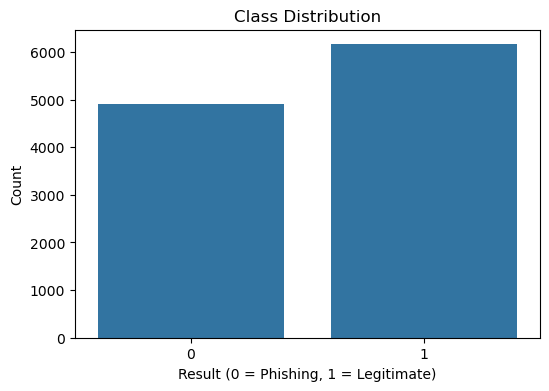

In [8]:
# Count how many samples per class
class_counts = df['Result'].value_counts()
print("Class distribution:\n", class_counts)

# Visualize with a bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Result', data=df)
plt.title('Class Distribution')
plt.xlabel('Result (0 = Phishing, 1 = Legitimate)')
plt.ylabel('Count')
plt.show()


In [9]:
# Summary statistics of all numeric features
df.describe()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.556943
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.496769
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


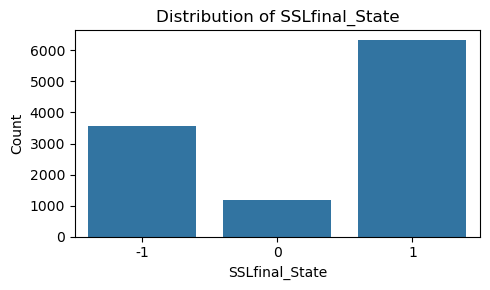

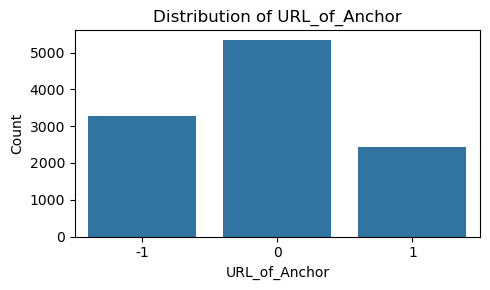

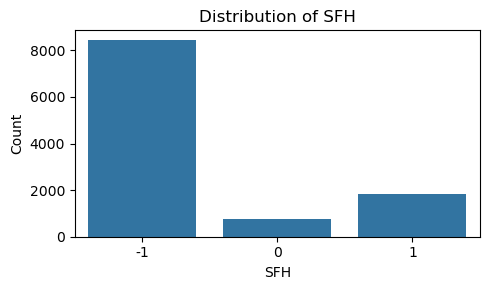

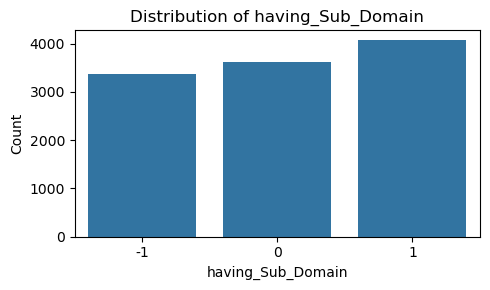

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few sample features to visualize
sample_features = ['SSLfinal_State', 'URL_of_Anchor', 'SFH', 'having_Sub_Domain']

# Plot distributions
for feature in sample_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


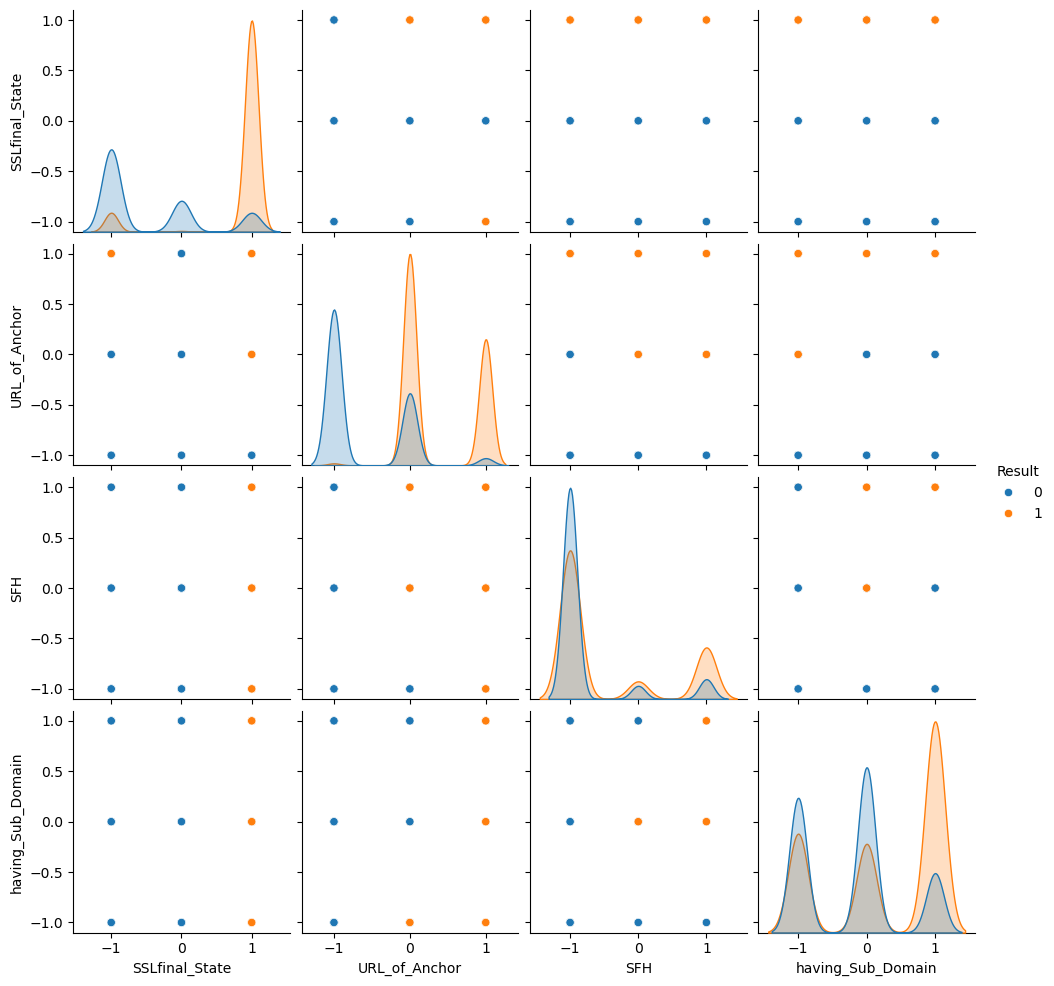

In [12]:
sns.pairplot(df[['SSLfinal_State', 'URL_of_Anchor', 'SFH', 'having_Sub_Domain', 'Result']], hue='Result')
plt.show()


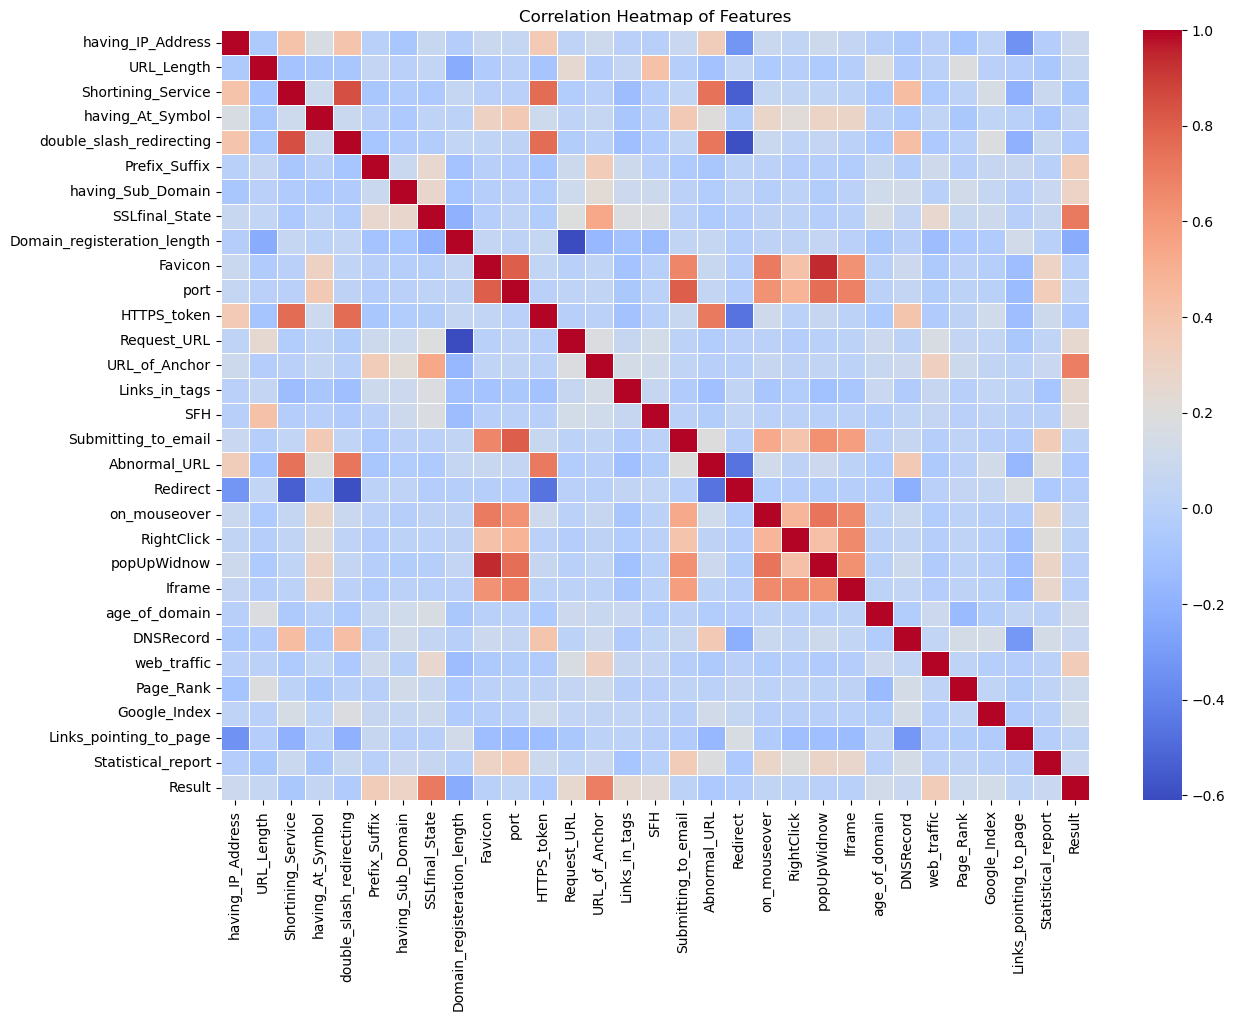

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Split features and target
X = df.drop('Result', axis=1)
y = df['Result']

# 2. Split into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = rf_model.predict(X_test)

# 5. Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))


Random Forest Accuracy: 96.70%


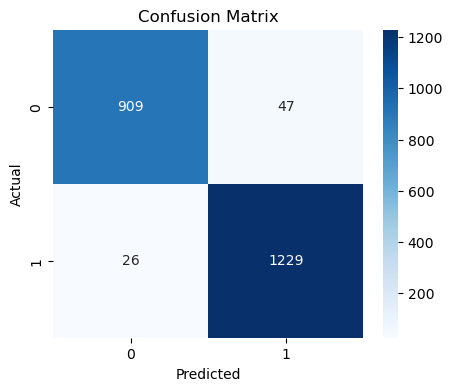


Classification Report:

                precision    recall  f1-score   support

  Phishing (0)       0.97      0.95      0.96       956
Legitimate (1)       0.96      0.98      0.97      1255

      accuracy                           0.97      2211
     macro avg       0.97      0.97      0.97      2211
  weighted avg       0.97      0.97      0.97      2211



In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Phishing (0)', 'Legitimate (1)']))


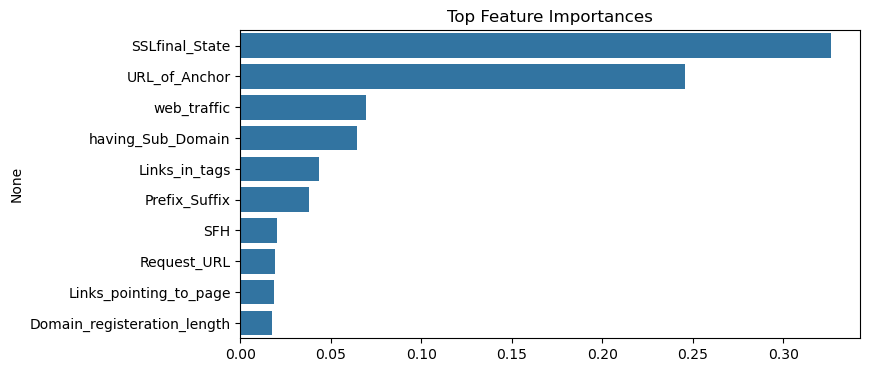

In [18]:
importances = rf_model.feature_importances_
features = X.columns
sorted_idx = importances.argsort()[::-1][:10]  # Top 10

plt.figure(figsize=(8,4))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title('Top Feature Importances')
plt.show()


In [19]:
df.to_csv('phishing_dataset_cleaned.csv', index=False)
